<h1> Sobreviventes do Titanic </h1> 




![Imagem do Titanic](https://www.additiva.com.br/upload/blog/LJ9yDdWyL1QyZRZ40NkVurPwlbSv8dZr6Ekth0Tp.jpeg)

<h2> Visão Geral do Projeto </h2> 

O RMS Titanic, um transatlântico britânico construído pela Harland and Wolff para a White Star Line, era na época um dos maiores e mais luxuosos navios de passageiros do mundo. Iniciou sua viagem inaugural em 10 de abril de 1912, partindo de Southampton, Inglaterra, com destino a Nova York. O navio era uma maravilha da engenharia e luxo, incluindo instalações como piscina, ginásio, biblioteca e restaurantes de primeira classe.

Na noite de 14 de abril, o Titanic colidiu com um iceberg no Atlântico Norte e afundou nas primeiras horas do dia 15. Este desastre resultou na morte de mais de 1.500 pessoas das aproximadamente 2.224 a bordo, marcando-o como um dos naufrágios mais mortais em tempos de paz. O trágico destino do Titanic provocou mudanças significativas nas leis de navegação e medidas de segurança marítima, simbolizando a hubris humana e a vulnerabilidade diante da natureza.

A história do Titanic ganhou um lugar permanente na cultura popular, inspirando uma variedade de obras artísticas, incluindo o aclamado filme de 1997. O fascínio contínuo por seu legado reflete não apenas a tragédia do desastre, mas também as histórias humanas e as lições aprendidas com ele.

Tendo em vista a importância histórica do Titanic, o projeto busca identificar características dos tripulantes do Navio que sobreviveram, por meio de bases de dados fornecidas pela plataforma Kaggle.

<h2> Objetivos 

>**1.Identificar as Características de perfil mais relevantes para a morte, ou não do indivíduo no acidente;** <br>
**2. Utilização de Modelos de Aprendizado de Máquina para treinar o algoritimo e prever a sobrevivência, ou não, de cada indivíduo.**


<h2> Motivações </h2> 

>A base de dados em questão, testa-se de um problema ao qual o algoritimo deve classificar o passageiro como sobreviventte, ou não, sendo, dessa forma, uma oportunidade para utilizar modelos de Machine Learning em problemas de classificação. 

## Target

>Nesse caso, a coluna que será utilizada como Target na Base de Dados, será a coluna `Survived`, ao qual: <br>
    0 = Não Sobreviveu 
    <br>
    1 = Sobreviveu

## Features

 * `Pclass`: indica a classe da passagem (*ticket*).
    - 1 = 1st, 
    - 2 = 2nd, 
    - 3 = 3rd.
 * `Sex`: sexo do passageiro. 
    - female,
    - male.
 * `Age`: idade em anos.
 * `Sibsp`: número de irmãos e/ou cônjuges a bordo do Titanic.
 * `Parch`: número de pais e/ou filhos a bordo do Titanic.
 * `Ticket`: número do *ticket*.
 * `Fare`: tarifa do passageiro.
 * `Cabin`: número da cabine.
 * `Embarked`: portão de embarque.
    - C = Cherbourg, 
    - Q = Queenstown, 
    - S = Southampton.


## 1. Inicialização e Tratamento dos Dados

Importação das Bibliotecas Necessárias 


In [97]:
%matplotlib inline
import pandas as pd
pd.options.mode.chained_assignment = None
from math import*
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
import folium.plugins 
from sklearn import metrics
from folium.plugins import HeatMap
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from folium.plugins import HeatMap
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import folium.plugins
from folium.plugins import HeatMap
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
import scipy 
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

Inicializando a Base de dados 

In [98]:
df = pd.read_csv('train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<h3> 1.1 Tratamento de Valores Ausentes nas Colunas do DataFrame </h3>

Como a Coluna `Cabin` indica valores muito específicos, que se repetem pouco, e já remetem à identificação dos passageiros, além da questão de ser uma variável qualitativa, iremos remover a coluna do DataFrame, juntamente com a coluna 'Passenger ID' e 'Embarked', 'Name' e 'Ticket', que são Features apenas de Identificação do Registro, não indicando análise de perfil.

In [100]:
df= df.drop('Cabin' , axis = 1 )
df = df.drop('PassengerId' , axis = 1)
df = df.drop('Name' , axis = 1)
df = df.drop('Embarked' , axis = 1)
df = df.drop('Ticket' , axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [101]:
contagem_ausentes = df.isnull().sum() # A função Isnull, identifica os valores ausentes em cada Series, retornando com True ou False 
contagem_ausentes # Já a função 'sum', soma esses valores ausentes, para cada coluna
ausentes = contagem_ausentes[contagem_ausentes > 0] # Essa linha imprime só as colunas que não têm valores 
ausentes

Age    177
dtype: int64

Percebe-se que a coluna `Age` possui 177 valores Nulos, mas, ao mesmo tempo, é uma coluna que apresenta relevância para a análise, logo, posso adotar as seguintes metodologias para preenchê-los: 

1.Preencher os Valores com os Valores das `Medianas` das idades; <br>
2.Utilizar a Esperança, baseada no Modelo Normal de Probabilidade, e, a partir disso, preencher com essa Esperança; <br>
3.Considerar outras variáveis que possam influenciar essa idade, e, a partir disso, calcular as medianas. <br> 

Para esse caso, vou considerar a 3ª opção: Utilizar as variáveis `PCLASS` e `SEX` para testar combinações e atingir a mediana para cada combinação em específica, visando um modelo de predição mais exato. 

In [102]:
# Vamos utilizar a Função 'Groupby', que agrupo o Dataframe pelas features já mostradas 

df_agrupado = df.groupby(['Sex' , 'Pclass'])
medianas_combinadas = df_agrupado['Age'].median()

In [103]:
# Agora, é importante percorrer idade por idade, verificando se a linha é nula, para aplicar isso 

def aplica_mediana(linha): 
    if pd.isnull(linha['Age']): # Essa Parte Verifica se a Coluna idade da Respectiva Linha está preenchida, ou não
        return medianas_combinadas[linha['Sex']][linha['Pclass']] 
    else: 
        return linha['Age']
    
    

In [104]:
#Agora, vamos aplicar a função definida anteriormente, para, assim, termos as medianas dos Valores.
df['Age'] = df.apply(aplica_mediana, axis=1) # A função 'Aplly' aplica a função sobre todas as linhas do DataFrame, baseado nas colunas 


In [105]:
#Vamos, agora, verificar se a metodologia foi bem-sucedida
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

Dessa forma, como não há presença de valores nulos no DataFrame, temos que essa etapa está parcialmente encerrada.Logo, vamos para a parte de Conversão das Variáveis Qualitativas.

`Obs`: Existem outras metodologias de Tratamentos de Valores Nulos que poderiam ser abordadas, cabendo, aqui, possíveis melhorias posteriores do modelo. 

<h3> 1.2. Conversão das Variáveis Categóricas </h3> 

Algumas variáveis estão declaradas como `Object`, o que mostra que o Pandas não reconhece-as como variáveis qualitativas. Assim, devemos transformá-las em variáveis categóricas:  

In [106]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [107]:
df.Pclass = df.Pclass.astype('category')
df.Sex = df.Sex.astype('category')
df.Survived = df.Survived.astype('category')
df.dtypes

Survived    category
Pclass      category
Sex         category
Age          float64
SibSp          int64
Parch          int64
Fare         float64
dtype: object

Temos, também, que mudar os Rótulos das `variáveis qualitativas`, para facilitar o entendimento pelo Python.

In [108]:
df.Sex.cat.categories = ['female','male'] # A função Cat.categories é utilizada, aqui, para renomear as variáveis qualitativas
df.Pclass.cat.categories = ['1st','2nd','3rd'] #É possível utilizá-la,também, para visualizar os nomes, inicialmentw
df.Survived.cat.categories = ['No', 'Yes']

In [109]:
df.Sex = pd.Categorical(df.Sex, categories=['female','male'], ordered=False)
df.Pclass = pd.Categorical(df.Pclass, categories=['1st','2nd','3rd'], ordered=True)
df.Survived = pd.Categorical(df.Survived, categories=['No', 'Yes'], ordered=False)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,No,3rd,male,22.0,1,0,7.2500
1,Yes,1st,female,38.0,1,0,71.2833
2,Yes,3rd,female,26.0,0,0,7.9250
3,Yes,1st,female,35.0,1,0,53.1000
4,No,3rd,male,35.0,0,0,8.0500


Diante disso, para finalizar a parte de tratamento e processamento dos dados, vou criar uma última coluna: `Family_size`, por meio da combinação das Features `SibSp` e `Parch`: 

In [110]:
df['Family_size'] = df.SibSp + df.Parch + 1
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family_size
0,No,3rd,male,22.0,1,0,7.2500,2
1,Yes,1st,female,38.0,1,0,71.2833,2
2,Yes,3rd,female,26.0,0,0,7.9250,1
3,Yes,1st,female,35.0,1,0,53.1000,2
4,No,3rd,male,35.0,0,0,8.0500,1


Baseado no Processo de Processamento da Base de dados, temos que a Base de dados já está apropriada para começarmos a analisar uma questão relevante: **Análise Exploratória**.

<h2>2. Análise Exploratória dos Dados (EDA) </h2> 



### O que é EDA?
A Análise Exploratória de Dados (EDA) é um processo inicial crucial em qualquer projeto de Machine Learning ou análise de dados. Ela envolve uma série de técnicas para:
- Visualizar,
- Sumarizar,
- e Interpretar os dados disponíveis.

O objetivo da EDA é obter insights, descobrir padrões, identificar anomalias ou inconsistências, e formular hipóteses com base nas características observadas nos dados.

### Importância da EDA no Projeto
1. **Compreensão dos Dados**: A EDA ajuda a entender a natureza e a qualidade dos dados, incluindo distribuições, correlações e presença de outliers.

2. **Direcionamento para Modelagem**: As observações feitas durante a EDA podem direcionar a seleção de modelos apropriados e técnicas de pré-processamento.

3. **Identificação de Problemas**: A identificação precoce de problemas nos dados (como valores ausentes ou outliers) pode economizar tempo e esforço em etapas posteriores do projeto.

4. **Geração de Hipóteses**: A análise dos dados pode levar à formulação de hipóteses que podem ser testadas com modelos estatísticos ou de Machine Learning.

5. **Feature Engineering**: A EDA pode revelar oportunidades para a criação de novas features que podem melhorar o desempenho dos modelos.


In [111]:
df.dtypes

Survived       category
Pclass         category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Family_size       int64
dtype: object

Antes de Começar, vou dividir a base de Dados em 2: 

1. Sobreviventes 
2. Não Sobreviventes 

Para facilitar comparações posteriores que serão feitas na EDA. 

In [112]:
filtro_vivo = df.Survived == 'Yes'
filtro_morto = df.Survived == 'No'

df_vivo = df.loc[filtro_vivo , :]
df_morto =df.loc[filtro_morto , :]


<h3> 2.1. Análise das Variáveis Categóricas </h3> 

Nesse momento, quero entender como as variáveis qualitativas relacionam-se com a Sobrevivência da Pessoa, dessa forma, vou observar as variáveis `Pclass` e `Sex.`

**Análise do Número de Sobreviventes** 

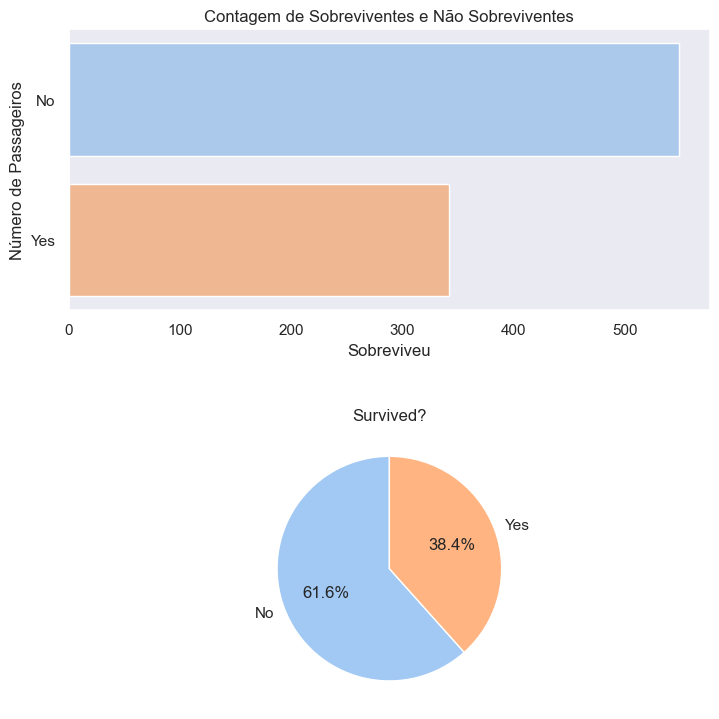

In [113]:
contagem_survives = df.Survived.value_counts()
plt.figure(figsize = (8,8)) #Ajuste do tamanho da imagem 


sns.set(style = 'dark') #Mudando o Fundo 
 

plt.subplot(211)

sns.set_palette('pastel') #Mudando a Paleta de cores da Imagem 
sns.countplot(y='Survived', data=df) #Barplot 

plt.title('Contagem de Sobreviventes e Não Sobreviventes')
plt.xlabel('Sobreviveu')
plt.ylabel('Número de Passageiros')

plt.subplot(212)
plt.pie(contagem_survives, labels=contagem_survives.index, autopct='%1.1f%%', startangle=90)

plt.title('Survived?')
plt.tight_layout(pad=3.0) #Ajustando o Espaçamento entre os gráficos 
plt.show()

**Análise por Sexo** 

Nesse momento, vamos analisar a relação de Sobrevivência entre cada gênero, para entender como cada um se manifesta nesse sentido.

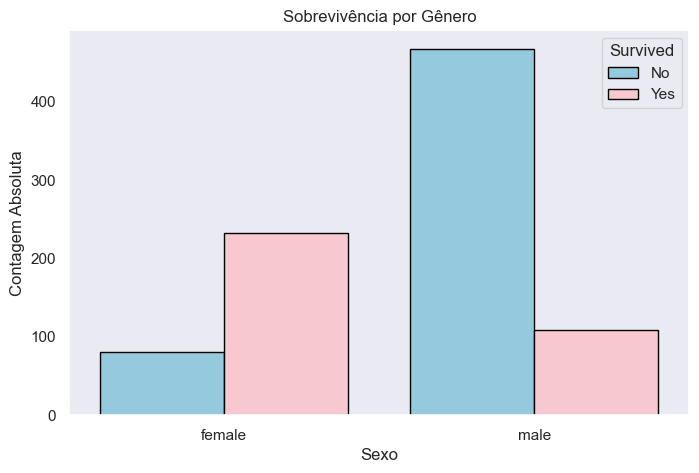

In [114]:
cores = ['skyblue' , 'pink']
plt.figure(figsize=(8,5))


sns.countplot(x='Sex', hue='Survived', data=df , palette = cores , edgecolor = 'black')
plt.title('Sobrevivência por Gênero')
plt.xlabel('Sexo')
plt.ylabel('Contagem Absoluta')
plt.show()

**Análise por PCLASS**

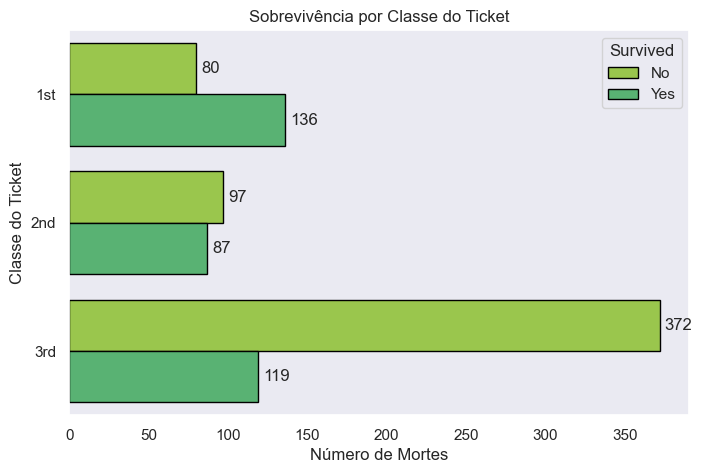

In [115]:

plt.figure(figsize=(8,5))

sns.set(style = 'dark')
sns.set_palette('viridis_r')
barras = sns.countplot(y='Pclass', hue='Survived', data=df , edgecolor='black')

for barra in barras.patches: #Aqui, eu irei acessar cada uma das 'barras' do barplot 
    width = barra.get_width() # Aqui, eu obtenho a largura da barra atual 
    barras.text(width + 3 , (barra.get_y() + barra.get_height() / 2) , f'{int(width)}' , ha='left', va='center')
plt.title('Sobrevivência por Classe do Ticket')
plt.xlabel('Número de Mortes')
plt.ylabel('Classe do Ticket')
plt.show()

Mais que essas Análises da relação entre as variáveis e a sobrevivência, é importante, também, entendermos como as variáveis `Pclass e Sex` relacionam-se entre si. Logo, vou fazer uma análise dessa relação para cada um dos Status: 'No' e 'Yes':

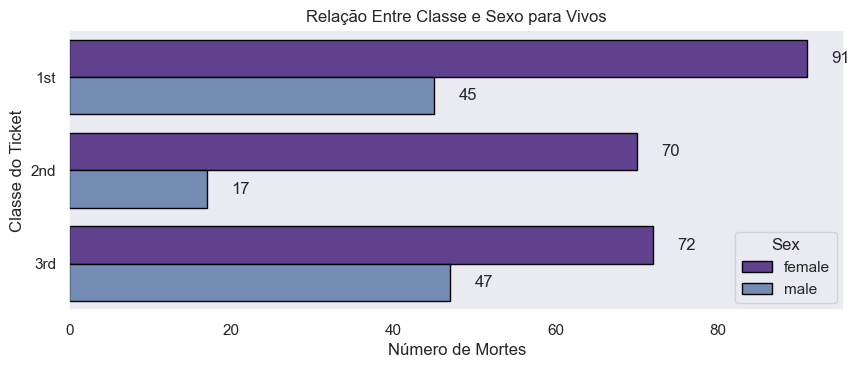

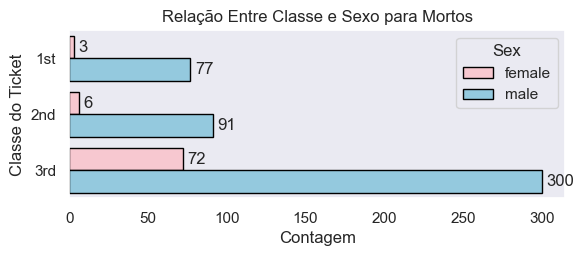

In [116]:
cores = [ 'pink' , 'skyblue' ]
plt.figure(figsize=(10,8))

plt.subplot(211)


sns.set(style = 'dark')
sns.set_palette('twilight_shifted')
barras = sns.countplot(y='Pclass', hue='Sex', data=df_vivo , edgecolor='black')

for barra in barras.patches: #Aqui, eu irei acessar cada uma das 'barras' do barplot 
    width = barra.get_width() # Aqui, eu obtenho a largura da barra atual 
    barras.text(width + 3 , (barra.get_y() + barra.get_height() / 2) , f'{int(width)}' , ha='left', va='center')

plt.title('Relação Entre Classe e Sexo para Vivos')
plt.xlabel('Número de Mortes')
plt.ylabel('Classe do Ticket')
plt.show()

plt.subplot(212)

sns.set(style = 'dark')
#sns.set_palette('tab20')
barras = sns.countplot(y='Pclass', hue='Sex', data=df_morto , edgecolor='black' , palette = cores)

for barra in barras.patches: #Aqui, eu irei acessar cada uma das 'barras' do barplot 
    width = barra.get_width() # Aqui, eu obtenho a largura da barra atual 
    barras.text(width + 3 , (barra.get_y() + barra.get_height() / 2) , f'{int(width)}' , ha='left', va='center')
plt.title('Relação Entre Classe e Sexo para Mortos')
plt.xlabel('Contagem')
plt.ylabel('Classe do Ticket')
plt.show()

<h3> 2.2. Análise das Variáveis Quantitativas </h3> 

Nesse Momento, vou buscar entender como as variáveis quantitativas relacionam-se com o Target e, mais que isso, buscarei entender como elas relacionam-se entre si, para entender, futuramente, as features mais relevantes para a construção do modelo. Dessa forma, vou, aqui, fazer uma análise das Features: `Age`, `Sibsp`, `Parch` , `Fare` e `Family_size`

<h4> Age </h4>  

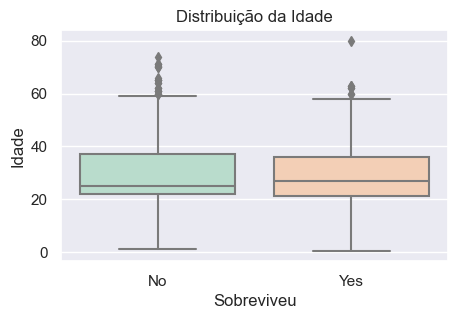

In [117]:

plt.figure(figsize=(5,3))

sns.set(style="darkgrid")
sns.set_palette('Pastel2')
sns.boxplot(x='Survived', y='Age', data=df )
plt.title('Distribuição da Idade')
plt.xlabel('Sobreviveu')
plt.ylabel('Idade')

# Mostrar o gráfico
plt.show()

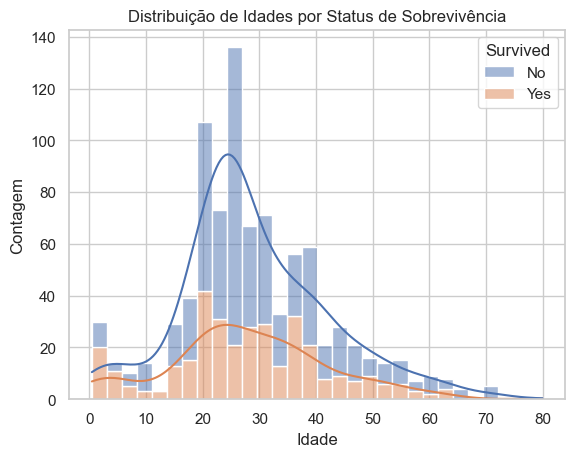

In [118]:
sns.set(style="whitegrid")

# Criar um histograma
sns.histplot(data=df, x='Age', hue='Survived', kde=True, multiple='stack' , bins = 30)

# Adicionar títulos e rótulos
plt.title('Distribuição de Idades por Status de Sobrevivência')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

(0.0, 0.06)

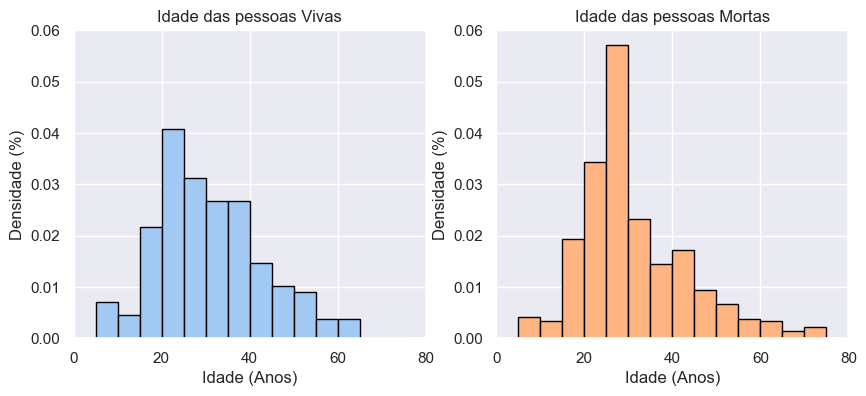

In [119]:
faixas = np.arange(5 , 80 , 5)
sns.set(style="darkgrid")
palette = sns.color_palette("pastel", 15)
plt.figure(figsize = (10 , 4))

plt.subplot(121)


plt.hist(df_vivo.Age , bins = faixas , density = True , color = palette[0] , edgecolor = 'black')
plt.xlabel('Idade (Anos)')
plt.ylabel('Densidade (%)')
plt.title('Idade das pessoas Vivas')
plt.xlim( 0 , 80)
plt.ylim(0 , 0.06)
plt.subplot(122)


plt.hist(df_morto.Age , bins = faixas , density = True , color = palette[1] , edgecolor = 'black')
plt.xlabel('Idade (Anos)')
plt.ylabel('Densidade (%)')
plt.title('Idade das pessoas Mortas')
plt.xlim( 0 , 80)
plt.ylim(0 , 0.06)


**Sibsp**

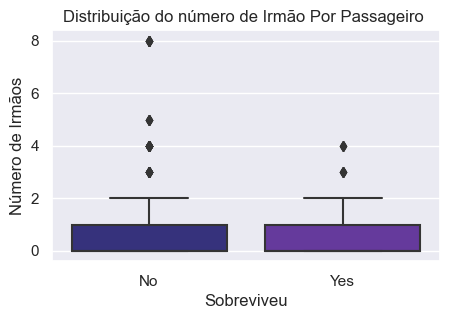

In [120]:

plt.figure(figsize=(5,3))

sns.set(style="darkgrid")
sns.set_palette('CMRmap')
sns.boxplot(x='Survived', y='SibSp', data=df )
plt.title('Distribuição do número de Irmão Por Passageiro ')
plt.xlabel('Sobreviveu')
plt.ylabel('Número de Irmãos')

# Mostrar o gráfico
plt.show()

(0.0, 1.0)

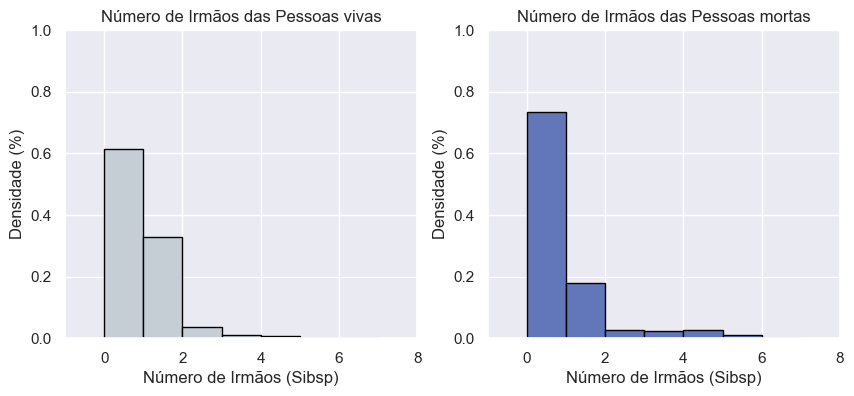

In [121]:
faixas1 = np.arange( 0 , 8 , 1)
sns.set(style="darkgrid")
palette = sns.color_palette("twilight", 15)
plt.figure(figsize = (10 , 4))

plt.subplot(121)


plt.hist(df_vivo.SibSp ,color = palette[0] , edgecolor = 'black' , bins = faixas1 , density = True)
plt.xlabel('Número de Irmãos (Sibsp)')
plt.ylabel('Densidade (%)')
plt.title('Número de Irmãos das Pessoas vivas')
plt.xlim( -1 , 8)
plt.ylim(0 , 1)

plt.subplot(122)


plt.hist(df_morto.SibSp ,color = palette[3] , edgecolor = 'black' , bins = faixas1 , density = True)
plt.xlabel('Número de Irmãos (Sibsp)')
plt.ylabel('Densidade (%)')
plt.title('Número de Irmãos das Pessoas mortas')
plt.xlim( -1 , 8)
plt.ylim(0 , 1)

**Parch**

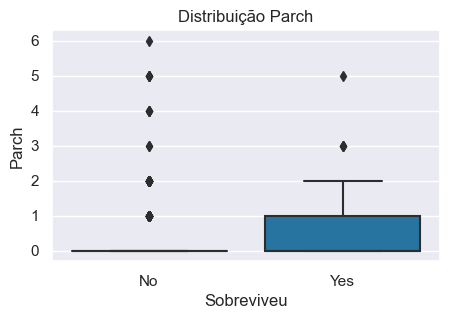

In [122]:
plt.figure(figsize=(5,3))

sns.set(style="darkgrid")
sns.set_palette('PuBu_r')
sns.boxplot(x='Survived', y='Parch', data=df )
plt.title('Distribuição Parch')
plt.xlabel('Sobreviveu')
plt.ylabel('Parch')

# Mostrar o gráfico
plt.show()

**Family_size** 

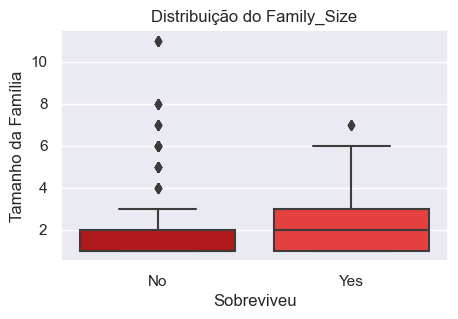

In [123]:
plt.figure(figsize=(5,3))

sns.set(style="darkgrid")
sns.set_palette('seismic_r')
sns.boxplot(x='Survived', y='Family_size', data=df )
plt.title('Distribuição do Family_Size')
plt.xlabel('Sobreviveu')
plt.ylabel('Tamanho da Família')

# Mostrar o gráfico
plt.show()

**Fare**

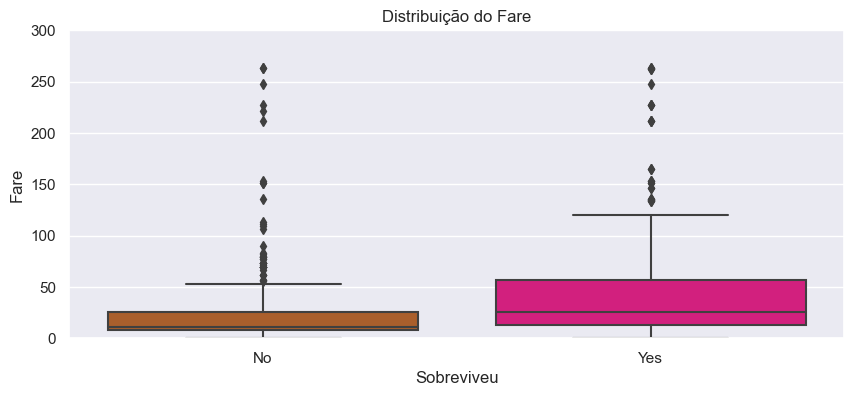

In [124]:
plt.figure(figsize=(10,4))

sns.set(style="darkgrid")
sns.set_palette('Accent_r')
sns.boxplot(x='Survived', y='Fare', data=df )
plt.title('Distribuição do Fare')
plt.xlabel('Sobreviveu')
plt.ylabel('Fare')
plt.ylim( 0 , 300)
# Mostrar o gráfico
plt.show()

(-10.0, 300.0)

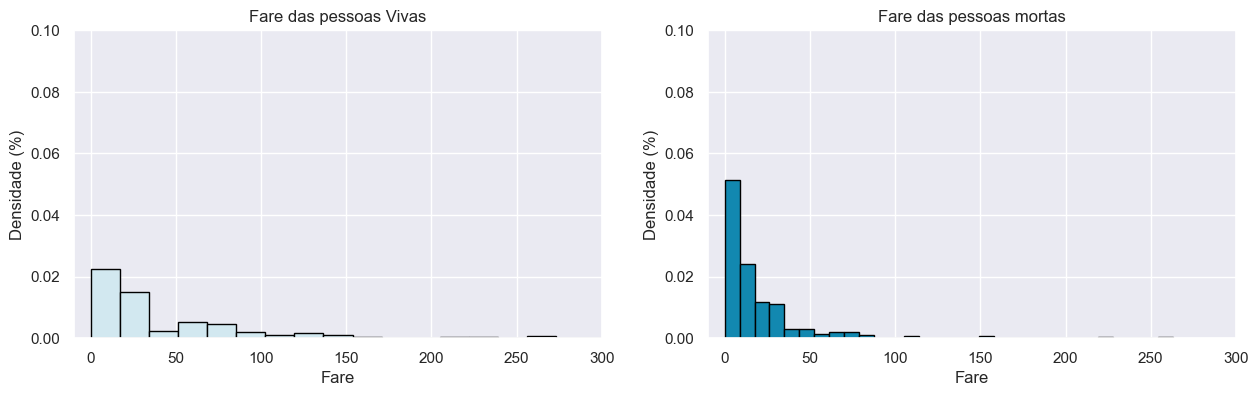

In [125]:
sns.set(style="darkgrid")
palette = sns.color_palette("ocean", 15)
plt.figure(figsize = (15, 4))

plt.subplot(121)


plt.hist(df_vivo.Fare ,color = palette[14], edgecolor = 'black' , bins = 30,density = True)
plt.title('Fare das pessoas Vivas')
plt.xlabel('Fare')
plt.ylabel('Densidade (%)')
plt.ylim( 0 , 0.1)
plt.xlim(-10 , 300)
plt.subplot(122)


plt.hist(df_morto.Fare ,color = palette[10], edgecolor = 'black' , bins = 30,density = True)
plt.xlabel('Fare')
plt.ylabel('Densidade (%)')
plt.title('Fare das pessoas mortas') 
plt.ylim( 0 , 0.1)
plt.xlim(-10 ,  300)

Dada Essa Etapa de comparação de Análise da Relação das Variáveis quantitativas com feature, também é importante o processo de análise do comportamento das Features entre si, para entender, também, como as features mais relevantes são influenciadas pelas demais.

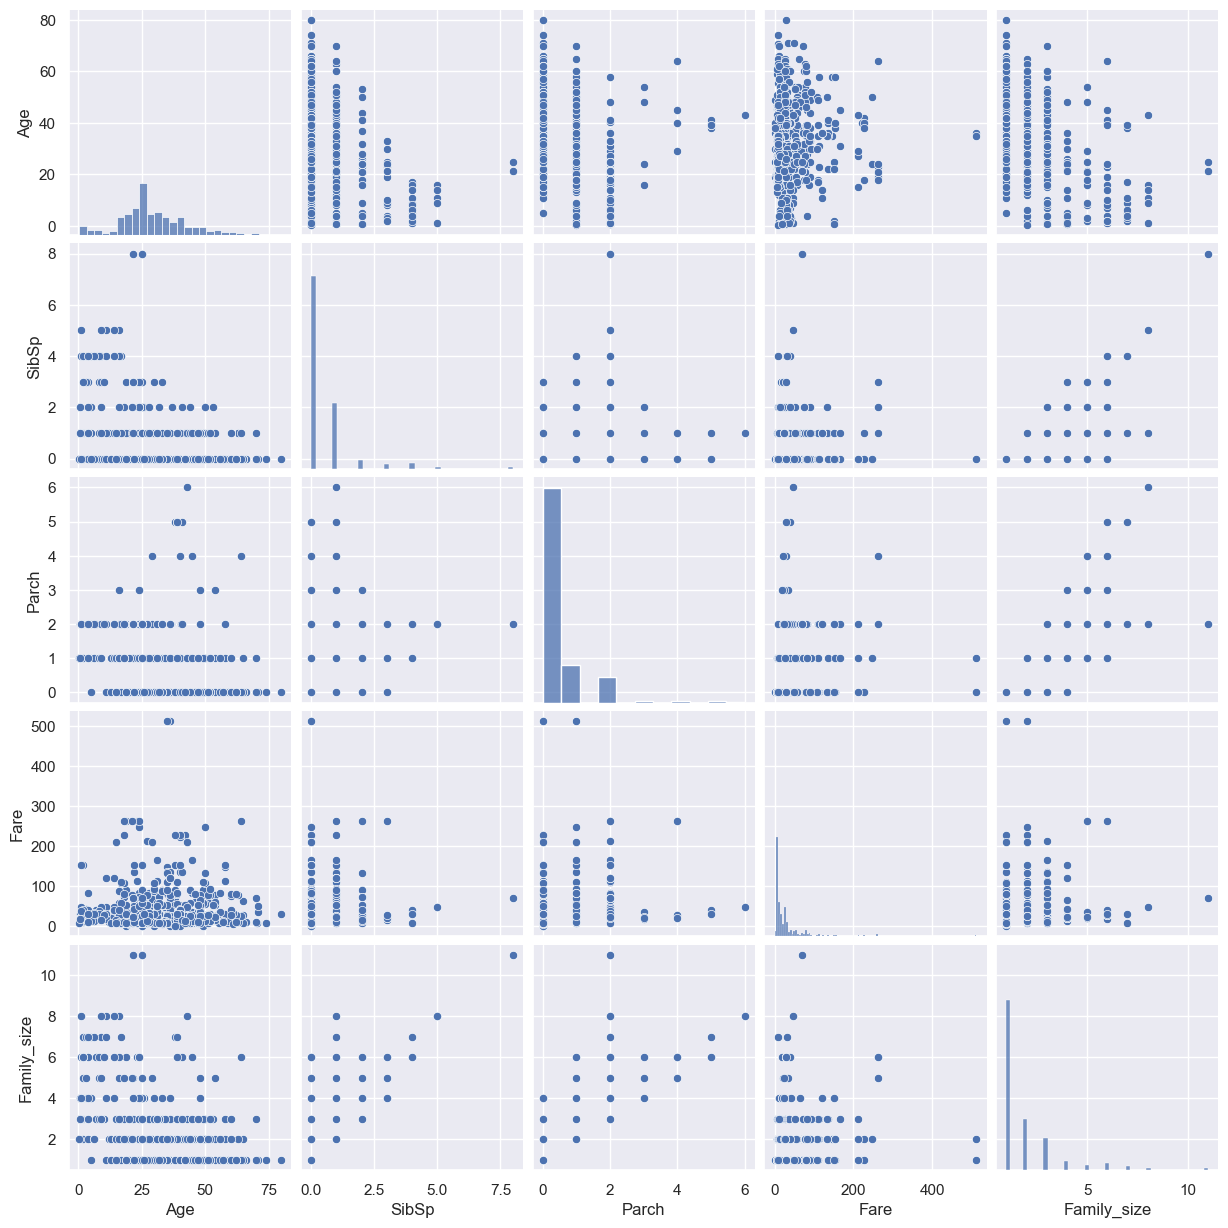

In [126]:
df_numericas = df.select_dtypes(include=['number'])
sns.pairplot(df_numericas)

<AxesSubplot:>

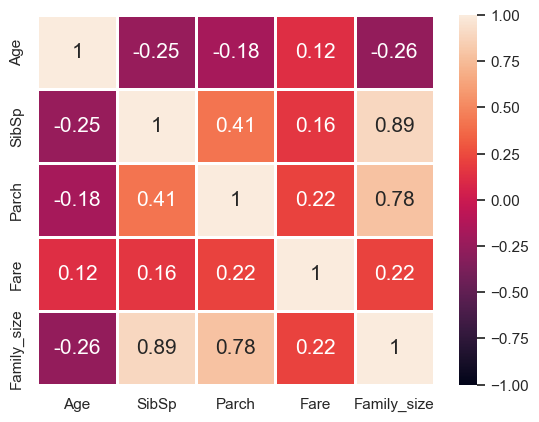

In [127]:
features_correlation = df_numericas.corr()
sns.heatmap(features_correlation , annot=True,linewidth=2 ,annot_kws={"fontsize":15}, vmin=-1, vmax=1)

<h3> Conclusões Acerca da Análise Exploratória de Dados </h3>

Nessa Etapa, vou registrar, aqui, as minhas descobertas acerca das relações entre as Features e a variável Target na Análise Exploratória, para, assim, prosseguirmos para a preparação da Base de dados para realizar os modelo Preditivos.

1. **Variáveis Qualitativas**: Nesse caso, percebe-se que as variáveis `Sex` e `Pclass` são de grande relevância para o modelo. Aqui, observou-se que: Para mulheres, há uma tendência menor de mortes do que homens. Além disso, para classes de Ticket mais altas, houveram números menores de mortes, principalmente para mulheres. Isso ilustra que ambas estão diretamente relacionadas às taxas de Mortes.

2. **Variáveis Quantitativas**: 

- `Parch` e `SibSp`: Apresentam baixa relevância para análise da Feature quando analisados de forma isolada, sendo possível tirar poucas conclusões. Além disso, não apresentam influência de outras variáveis.

- `Age`: A idade, no geral, mostra que, dentre os menores de idade, há uma quantidade maior de sobreviventes, e, entre 20 e 40 anos, há uma maior taxa de mortes. Pode ser relevante para a análise.

- `Fare`: Para Tarifas mais baixas, observa-se que há uma tendência de morte maior. Porém, ao assumir valores maiores, a tendência é de sobrevivência.Assim, a Fare uma variável relevante na análise, apesar de não influenciar outras variáveis.

- `Family_size`: Essa variável, diferentemente das que apresentam parentes isoladamente, mostrou-se releva. Pois, percebe-se que, para famílias maiores, há maior tendência de sSobrevivência. Além disso, por isso, pode ser relevante criar uma coluna para se a pessoa está solteira, na base de dados. 


3. **Hipóteses iniciais para construção de perfil:**

**Perfil de sobrevivente:** 

- Mulher;
- Idade inferior à 20 anos;
- 1ª classe de Ticket;
- Tarifa superior a 20000;
- Família de 2 pessoas ou mais.

**Perfil de não sobrevivente**: 

- Homem;
- Idade entre 20 e 45 anos; 
- 3ª classe de Ticket 
- Tarifa inferior à 5000;
- Família de 1 pessoa. 


<h2> 3. Feature Engineering </h2> 

<p>Nesse momento, vou iniciar o pré-processamento dos dados para que, posteriormente, seja iniciado o uso de modelos preditivos no projeto. Essa Etapa é Extremamente relevante para a aplicação dos modelos Machine Learning, visto que trata-se de deixar a base de dados a mais limpa e legível possível, para que o Algoritmo consiga entender e correlacionar os dados.</p>

**1. Redução de Dimensionalidade**: 
    Tendo em vista o comportamento estudado das Features `Parch`e `SibSp`, essas features serão retiradas da base de dados de trenamento do modelo. 

In [128]:
df = df.drop('SibSp' , axis = 1)
df = df.drop('Parch' , axis = 1)

**2. Transformação dos dados**: Nesse caso, para preparar a Base de dados para a aplicação de técnicas de Aprendizado de Máquina, é necessário torná-la apropriada para leitura e processamento dos dados, e, por isso, vamos transformar as variáveis.

>**2.1.Transformação de Variáveis Categóricas**: Variáveis Categóricas são variáveis às quais não podem ter suas grandezas compreendidas pelos modelos de Machine Learning, que, no geral, adotam métodos numéricos. Assim, torna-se necessário tornar essas variáveis legíveis para a 'Máquina'. Para tal, utilizaremos as seguintes métricas: 

**1. One Hot Encoding**: Modelo que consiste em tranformar as valores das Series em valores correpondentes em 1 ou 0, em observação.Nesse caso, vamos utilizá-lo para a coluna `Sex` e o target `Survived`. <br>
**2. Label Encoding**: Consiste em transformar os valores das Series em uma escala ordenada, utilizado, principalmente, para variáveis qualitativas ordinais. Nessa situação, isso será empregado para a coluna `Pclass`


In [129]:
#Convertendo a coluna 'Survived'
df['Survived'] = df['Survived'].replace({'No': 1, 'Yes': 0})
df['Survived'] = df['Survived'].astype(int)

#Convertendo a coluna 'Sex'
df['Sex'] = df['Sex'].replace({'female': 1, 'male': 0})
df['Sex'] = df['Sex'].astype(int)

#Convertendo a coluna 'Pclass'
df['Pclass'] = df['Pclass'].replace({'1st': 1, '2nd': 2 , '3rd':3 })
df['Pclass'] = df['Pclass'].astype('int')

>2.2. **Criação de Nova Variáveil**: Baseado no Insight Percebido a partir da Variável `Family_size`, percebe-se que as taxas de sobrevivência podem estar associados à questão do Indivíduo estar, ou não, em família. Assim, será criada a variávei `Alone`, a qual: 
- 0 = Sozinho 
- 1 = Acompanhado

In [130]:
def alone(linha): 
    if linha['Family_size'] == 1:
        return 0
    else:
        return 1 
df['Alone'] = 0
df['Alone'] = df.apply(alone, axis=1)

**3. Transformação dos Dados**: Agora, vamos para uma etapa de Separação da base de dados para a implementação dos modelos de Machine Learning.

In [131]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Family_size' , 'Alone']
target = ['Survived']
X = df[features]
Y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)


<h2> 4.Machine Learning </h2>

Nesse momento, entraremos em uma parte crucial do projeto: A modelagem dos dados para a predição da morte, ou não, dos passageiros do Titanic. Para isso, utiliaremos técnicas de Machine Learning, essencial para entender padrões dentro dos dados, e realizar essa predição. Antes de iniciar a construção dos modelos de predição, gostaria, aqui, de fazer uma breve introdução acerca do que trata-se essa técnicas. 

> **1.O que é o Machine Learning?** <br> <br>
**Machine Learning** é uma técnica que permite aos computadores a capacidade de **aprender** e **melhorar** a partir da experiência sem ser explicitamente programados para isso. Em essência, é sobre desenvolver algoritmos que usam dados para aprender e fazer previsões ou decisões. O Machine Learning é extremamente utilizado em processos de automação dentro de processos de produção, e para mensurar a importância de Features dentro de um grande conjunto de dados.

>**2.Tipos de Machine Learning** <br> 
<br>
**2.1.Machine Learning Supervisionado**: Aqui, você treina um modelo com dados que já estão etiquetados com a resposta correta. O objetivo é que o modelo aprenda a partir desses dados para fazer previsões ou estimativas em novos dados. <br> <br>
**2.2.Machine Learning Não Supervisionado**:Neste caso, o modelo é treinado em um conjunto de dados sem etiquetas. O objetivo é explorar os dados para encontrar algum tipo de estrutura ou padrão. Exemplos comuns incluem clustering (agrupamento) e redução de dimensionalidade. <br> <br>
**2.3.Aprendizado por Reforço**:Aqui, o algoritmo aprende a realizar uma tarefa através de tentativa e erro. O modelo faz previsões, recebe feedback do ambiente (geralmente na forma de recompensas ou punições) e ajusta suas ações de acordo. Um exemplo clássico é um modelo que aprende a jogar um jogo.

No contexto da Base de dados do `Titanic`, trabalharemos com modelos de Machine Learning `Supervisionado`, com o objetivo de mensurar a `relevância` de cada Feature para a predição da sobrevivência da Pessoa. <br> 

Dessa forma, escolherei 3 modelos para fundamentar uma base teórica acerca deles: `Random Forest`, `Logistic Regression` e  `Multinomial Naive-Bayes`.

<h3>1. Primeiros Modelos : Random Forest (Floresta Aleatória) e Decision Tree (Árvore das Decisões) </h3> 

O Algoritimo de Machine Learning supervisionado Random Forest, é uma metodologia de predição baseada em Ensemble Learning, ou seja, a construção de diversos modelos diferentes, para realizar uma previsão. No caso da Random Forest, trata-se da combinação de diversas 'Decisions Trees', para, a partir da média das previsões das Árvores, construir uma resposta. Além disso, vale ressaltar que ele configura-se na classe Bagging, de metodologias Ensemble Learning, que consiste em dividir a base de dados em diversas 'micro' base de dados, e, para cada uma delas, são treinadas as árvores de decisão já citadas, e isso permite com que o modelo tome decisões baseadas nas decisões da maioria. 




![Imagem da Random Forest](https://miro.medium.com/v2/resize:fit:1400/1*jE1Cb1Dc_p9WEOPMkC95WQ.png)

**Como funciona o Modelo de Decision Tree (Árvore das Decisões)?**


O modelo Decision Tree, assim como o Random Forest, é utilizado tanto para modelos de classificação, quanto para problemas de regressão, destacando-se pela sua flexibilidade. O modelo de tomada de decisão é semelhante à de um fluxograma,que utiliza um controle condicional para elaborar a sua tomada de decisão.Baseado nisso, estrutura-se com os seguintes componentes:  

- Nó Raiz: Ponto de Partida da árvore;
- Nó de Decisão: Ponto onde a árvore se divide, baseado em alguma feature;
- Folhas: Nós que representam uma decisão da árvore.

Abaixo, um exemplo ilustrativo de funcionamento: 
![Imagem de uma Árvore de Decisão](https://av-eks-blogoptimized.s3.amazonaws.com/542834.png)




**Suposições Feitas pela Árvore das Decisões**:

>1.Divisões Binárias: Cada nó, baseado no valor que a classe assume, é dividido em 2 'subdatasets', baseada em uma formatação condicional ; <br>
>2.Independência entre as features: O Classificador assume que as features são, de modo geral, independentes; <br>
>3.Homogeneidade: O classificador, busca, fazer divisões que deixem o nó o mais homgêmeo possível em relação a uma classe, de modo a reduzir o grau de Impureza do nó; <br> 
>4.Valor de Impureza: A árvore sempre busca tomar decisões para reduzir o grau de impureza de determinado nó; <br> 
>5. Sem Valores nulos: A árvore das decisões assume que não há valores nulos na base de dados; <br> 
>6.As árvores de decisão podem assumir igual importância para todos os recursos, a menos que a escala ou ponderação dos recursos seja aplicada para enfatizar determinados recursos; <br>
>7.Outliers: A árvore das decisões assume que não há outliers, o que torna-a sensível a eles.


**Usado da Entropia para tomadas de decisões**

Como dito anteriormente, a Árvore utiliza do grau de impureza de certa feature em relação às classes, pra dividí-la de modo que a divisão fique a mais homogêmea possível, para que, baseado nesse grau de homogêmeidade, seja possível concluir a acertividade da divisão do nó. Esse cálculo pode ser feito de 2 formas: 

1. Impureza de Gini: $$
Gini = 1 - \sum_{i=1}^{n} p_i^2
$$

2. Entropia:
$$
Entropia = -\sum_{i=1}^{n} p_i \log_2(p_i)
$$

Dessa forma, a árvore dividirá o galho, de modo a formar nós o mais homogêmeos possíveis e, assim, ter a tomada de decisão a partir do nó homogêmeo. Assim, para tomar a melhor decisão, o algoritimo utiliza de uma métrica chamada 'Information Gain' (ganho de informação), que ilustra o quanto a impureza do filho diminuiu em relação ao pai: 
$$
\text{Information Gain } = E(X) -E(Y/X)
$$

A árvore utiliza do cálculo desse ganho de informação, para entender qual features priorizar na divisão dos nós da árvore. 



**Quando a árvore para de dividir?** 

De modo geral, a árvore irá parar de dividir os nós em 2 situação: 

1. Hiperparâmetro `max_depth`: Determina a profundidade total da árvore, de modo que a complexidade da árvore de treinamento não fique muito grande, o que pode atrapalhar o desempenho no teste, e, assim, causar overfitting;

2. Métrica de impureza: Quando as métricas de impureza das 2 divisões são iguais a 0. De modo geral, para dataframes com dimensões em larga escala, essa situação torna-se muito distante, o que torna mais comum recorrer à métrica de `max_depth`.

**Vantagens e Desvantagens da Random Forest em relação à Decision Tree**

1.Vantagens: 
- Redução do Overfitting <br>
- Melhoria na precisão do modelo <br>
- Aumento da diversidade das árvores <br>
- Menor sensibilidade à outliers <br> 
2.Desvantagens:
- Dificuldade de Visualização e Interpretabilidade <br>
- Tempo de Treinamento <br> 

**Hiperparâmetros na construção da Random Forest**

**1. n_estimators:** Consiste no número de Árvores que serão criadas na divisão da base de dados. Esse parâmetro é relevante para melhorar a precisão do modelo. Porém, é importante atentar que, quanto mais árvores são implementadas, mais tempo é demorado o treinamento do modelo, o que, não necessariamente, é melhor; <br>

**2. max_depth**: Consiste na profundidade de cada Árvore de decisão. É um parâmetro importante para definirmos a complexidade de treinamento da árvore de decisões. Porém, assim também é um parâmetro que deve ser usado com muito cuidado, pois apesar dele aumentar a capacidade do algoritimo identificar padrões na base de dados de treinamento, essa complexidade pode não se aplicar à base de dados com particularidades diferentes, o que pode piorar o modelo. <br>
**3. min_sample_split**: É o número mínimo de observações em um nó, para dividirmos ele. Assumir números maiores, permite-nos evitar a criação de nós muito específicos, o que evitar o overfitting. Porém, aqui, também é importante ressaltar que, para números pequenos de observações, há grande descrepância de desempenho entre treino e teste, mas, para números muito grandes, há uma grande similaridade, porém, queda de desempenho. Então, é importante que haja uma busca por um 'número ideal'. <br>
**4.max_leaf_nodes**: Define uma condição para a divisão dos nós da árvore e, portanto, restringe o crescimento da árvore.É relevante para evitar que o modelo cresça ao ponto de atingir grandes complexidades, o que pode prejudicar o desempenho no teste. <br>
**5.min_samples_leaf**: Número mínimo de observações que deve ser feito em cada folha para que ela se divida em mais nós. Importante, novamente, para evitar overfitting. <br>
**6. max_sample**: Determina qual % da base de dados é dada para cada Árvore, individualmente. <br>
**7. max_features**: Número máximo de features consideradas para dividir um nó. É uma métrica que deve ser utilizada para resolver o overfiting, também. 


<h3> Implementação dos Modelos </h3>

**1. Modelo Decision Tree**

In [132]:
tree = DecisionTreeClassifier()
tree.fit(X_train , y_train)
y_pred1 = tree.predict(X_test)
y_pred2 = tree.predict(X_train)
print('Acurácia no Teste : ',metrics.accuracy_score(y_test, y_pred1)* 100) 
print('Acurácia no Treino : ',metrics.accuracy_score(y_train, y_pred2)* 100) 


Acurácia no Teste :  79.1044776119403
Acurácia no Treino :  98.07383627608347


Aqui, percebe-se uma questão relevante: Percebe-se que o classificador de Árvore de Decisões apresenta um desempenho significativamente superior no Treinamento. Isso ocorre porque, provavelmente, a árvore está assumindo uma complexidade no Dataframe de treinamento, que não se reflete para o Dataframe de Teste. Essa fator demonstra a importância de limitar essa complexidade por meio de hiperparâmetros, para que haja uma similaridade de desempenho. Abaixo, vou Buscar visualizar a árvore: 

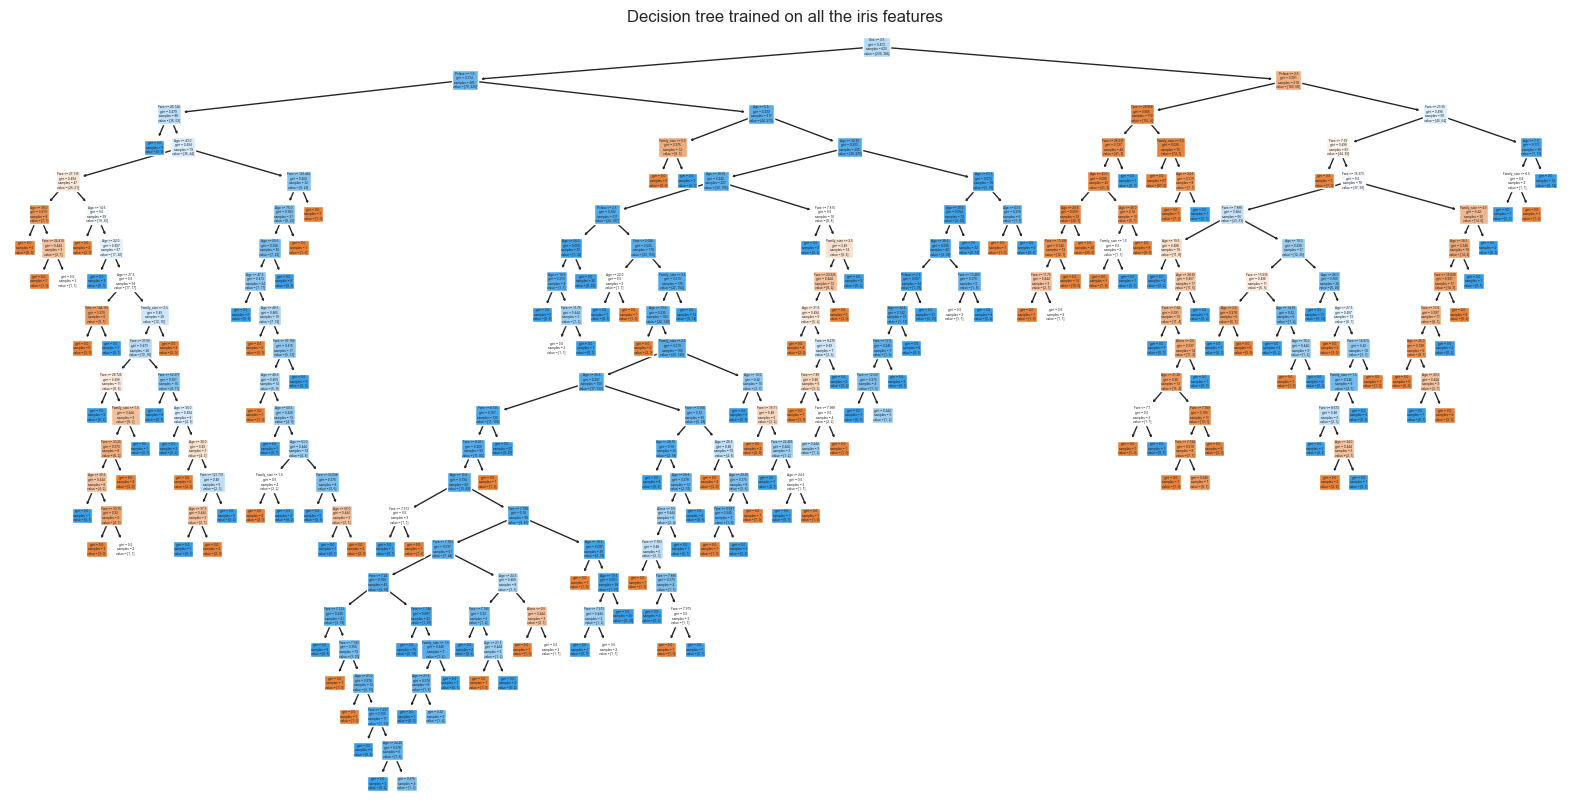

In [133]:
plt.figure(figsize = (20 ,10 ))
plot_tree(tree, filled=True ,feature_names = X_train.columns)
plt.title("Decision tree trained on all the iris features")
plt.show()

Acima, percebe-se a complexidade que a Árvore assumiu, de fato. Logo, isso reforça a importância do ajuste de hiperparâmetros para um modelo baseado em Árvores. Esse mesmo problema tende a se prorrogar para o modelo de Random Forest. 

**2. Modelo Random Forest** 



In [134]:
forest = RandomForestClassifier()
forest.fit(X_train , y_train)
y_pred1 = forest.predict(X_test)
y_pred2 = forest.predict(X_train)
print('Acurácia no Teste : ',metrics.accuracy_score(y_test, y_pred1)* 100) 
print('Acurácia no Treino : ',metrics.accuracy_score(y_train, y_pred2)* 100) 

Acurácia no Teste :  82.08955223880598
Acurácia no Treino :  98.07383627608347


Nesse caso, percebe-se, novamente, a discrepância entre ambos os parâmetros, o que reforça a necessidade de ajuste dos hiperparâmetros do modelo, posteriormente. 

<h3>2. Segundo Modelo : Logistic Regression Model (Regressão Logística) </h3> 

**O que é o modelo?** <br>
Regressão Logística, é outro modelo de aprendizagem de máquina supervisionado, usualmente utilizado para problemas de classificação, como o do problema em questão, e pode ser utilizado nas seguintes situações: 

1. Classificação de Targets Binários 
2. Classificação de Targets Multinominais
3. Classificação de Targets que correspondem à variáveis qualitativas ordinais. 

Nesse caso, utilizaremos o modelo de Regressão Logística para a classificação de Targets de Binários (sobreviveu ou morreu). 


**Lógica de Funcionamento do modelo**

A Regressão Logística, é uma adaptação do modelo de regressão linear, para atuar baseada em cálculos de probabilidade. Nesse sentido, o modelo calcula a probabilidade de uma 'linha' pertencer à classe 1, determinada pelo modelo, e, caso essa probabilidade exceda certo 'limite'(0.5 , na maioria das vezes), ela é classificada como pertencente à classe 1. Caso contrário, pertence à classe 0. Dessa forma, o cálculo de probabilidade para cada linha, é feita pelo uso da seguinte equação: 

$$
P = \frac{1}{1+ e^{-(\beta_0 + \beta_1 x)}}
$$


![Imagem da Regressão Logística](https://editor.analyticsvidhya.com/uploads/450163.png)

**Qual a diferença da Regressão Logítica para Linear?**

Em casos de problemas de classificação, a Regressão Linear torna-se inapropriada por estar adaptada à problemas de variáveis contínuas, visto que atua como uma reta de estimativa. Dessa forma, a regressão logística é vista como mais apropriada, para esses casos. Além disso, a Regressão Linear possui uma sensibilidade maior à outliers, em comparação com a RegressãoLogística, e isso afeta (e muito) o desempenho do modelo.

**Hiperparâmetros da Regressão Logítica**

**1. Solver:** O Algoritimo usado na otimização do modelo, ou seja, na otimização dos coeficientes do modelo, utilizados no cálculo de probabilidade já mencionado; <br> 
**2. Regularização:** Define um sistema de 'pesos' para as features de treinamento, para destacar as features mais relevantes, para evitar overfitting; <br>
**3 C (Força de regularização):** Mensura a relevância do parãmetro de regularização para o modelo, tornando-o relevante para evirtar overfitting.



<h3> Implementação dos modelos </h3> 

In [135]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train , y_train)
y_pred1 = logistic_regression.predict(X_test)
y_pred2 = logistic_regression.predict(X_train)
print('Acurácia no Teste : ',metrics.accuracy_score(y_test, y_pred1)* 100) 
print('Acurácia no Treino : ',metrics.accuracy_score(y_train, y_pred2)* 100) 

Acurácia no Teste :  82.08955223880598
Acurácia no Treino :  80.25682182985554


<h3>3. Terceiro Modelo: Multinomial Naive-Bayes </h3> 

**O que é o modelo?**

O modelo de aprendizagem supervisionado Naive-Bayes, é utilizado, geralmente, em problemas de classificação envolvendo diversas features, tanto em problemas de classificação envolvendo palavras, e, assim, apresenta maior utilização em problemas que envolvem variáveis categóricas. Ele consiste na utilização do Teorema de Bayes para calcular a probilidade da linha pertencer à cada classe: 

$$
 P(A|B) = \frac{P(B|A) \times P(A)}{P(B)} 
$$




O modelo assume que as features independentes entre si, o que pode prejudicar em situações de grande correlação entre as features. Por outro lado, utilizar esse tipo de modelo em estudos em que também são utilizados modelos de relação entre features, como o caso do Random Forest, pode evidenciar qual tipo de comportamento é mais pertinente para o Dataset em análise.


**Hiperparâmetros do Modelo** 

**1.alpha**: Esse é o valor que o modelo assume no Suavizador de Laplace,  função utilizada para trata o valor de probabilidade em caso do rótulo ter probabilidade igual a 0; <br>
**2.fit_prior:** Define se o modelo utilizará a probabilidade à priori estabelecida pelo modelo;<br>
**3.class_prior:** O usuário define previamente a probabilidade à priori.<br>

<h3> Implementação do modelo </h3> 

In [136]:
nave = MultinomialNB()
nave.fit(X_train ,  y_train)
y_pred1 = nave.predict(X_test)
y_pred2 = nave.predict(X_train)
print('Acurácia no Teste : ',metrics.accuracy_score(y_test, y_pred1)* 100) 
print('Acurácia no Treino : ',metrics.accuracy_score(y_train, y_pred2)* 100) 

Acurácia no Teste :  66.04477611940298
Acurácia no Treino :  71.107544141252


<h2>5.Análise de Desempenho dos Modelos </h2> 

Nesse momento, irei implementar métricas para mensurar o desempenho de todos os modelos, e entender as particularidades de classificação de cada um deles.

**5.1.1 Acurácia** 

A Acurácia trata-se da taxa de acertos nas previsões do modelo, dada por: 

$$
\text{Acurácia} = \frac{TP + TN}{TP + TN + FP + FN}
$$
<br> 
É uma métrica relevante, porém, para registrar uma visão geral de visualização do modelo, não deve ser avaliada isoladamente. 


**5.1.2. Precisão**


Essa métrica, trata de avaliar o quão prejudicial os casos de Falso Positivo são ao desempenho do modelo ,calculada por: 

$$
\text{Precisão} = \frac{TP}{TP + FP}
$$

Essa métrica é direcionada para casos em que o desempenho da classificação positiva é essencial para o produto final que o modelo oferecerá. 

**5.1.3. Recall**

A Recall avalia o quanto dos casos positivos o modelo conseguiu seguir corretamente, por meio da análise de distoância entre os positivos e negativos: 

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

É utilizada em situações em que as avaliações de 'Falso Negativo' devem ser minimizadas. 


**5.1.4. F1-Score** 

O F1-Score avalia a harmonia entre as medidas de `Recall` e `Precisão`, dada por: 

$$
\text{F1-Score} = 2  \times \frac{Precisão \times Recall}{Precisão + Recall}
$$

Desse modo, um F1-Score baixo indica que uma das métricas apresenta baixo desempenho. 

**5.1.5. Curva Roc e Auc** 

A Curva Roc é uma ferramenta de visualização gráfica, que nos auxilia a visualizar a relação entre verdadeiros positivos e falsos positivos do nosso modelo. 

![Imagem da Curva Roc](https://glassboxmedicine.files.wordpress.com/2019/02/roc-curve-v2.png)

Dessa forma, a métrica `Auc` (Area Under the Curve), é dada numa escala de 0 a 1, de modo que, quanto mais próxima de 1, melhor será relatado o desempenho do modelo. 

**5.1.6. Matriz de Confusão** 

A Matriz de Confusão ilustra a quantidade de classificações feitas para `Verdadeiros Positivos` , `Falsos Positivos`, `Verdadeiros Negativos` e `Falsos Negativos`. 

![Imagem da Matriz de Confusão](https://media.licdn.com/dms/image/C4D12AQE-hEJoe0y34w/article-inline_image-shrink_400_744/0/1538424289069?e=1709769600&v=beta&t=YGC-WJ-bd2koqLSM-lWI4g6Tu-jQJynKCGu5K3t8qlw)

Essa ferramenta é extremamente útil em problemas de Classificação, pois permite visualizar, as possíveis lacunas do modelo. 


**5.1.7. Método de Validação Cruzadas (K-Folds)**

Essa métrica, consiste em mensurar a consistência de cada uma das métricas utilizadas para avaliar o nosso modelo.Dessa forma, ela divide o DataFrame em treino e Teste K vezes, e, em cada uma delas, avalia o desempenho do modelo. 

![Imagem de k-folds](https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F967a2d4d-197d-4f31-82de-69b3634252ef_2048x1130.jpeg)

**5.2.1. Análise de Desempenho do modelo de Random Forest**



**Análise da Acurácia, Precisão, Recall, e F1-Score:** 

In [137]:
metricas = ['accuracy' , 'precision' , 'recall' , 'f1']
lista_anterior = []
for metrica in metricas: 
    #print('---------- Métrica: {0}---------- '.format(metrica))
    lista_metrica = cross_val_score(forest , X_test , y_test , cv=10 , scoring = metrica)
    media_metrica = lista_metrica.mean()
    lista_anterior.append(media_metrica)
    std_metrica = lista_metrica.std()
    print('Média de {0}:{1:.5f}'.format(metrica ,media_metrica))
    print('O Desvio Padrão de {0}: {1:.5f}'.format(metrica , std_metrica))


Média de accuracy:0.80541
O Desvio Padrão de accuracy: 0.06810
Média de precision:0.85694
O Desvio Padrão de precision: 0.07470
Média de recall:0.85551
O Desvio Padrão de recall: 0.05917
Média de f1:0.85602
O Desvio Padrão de f1: 0.04725


**Curva-Roc e Auc**

In [138]:
y_pred = cross_val_predict(forest, X_test, y_test, cv=10)

lista_rating = roc_curve(y_test , y_pred)
fpr_forest = lista_rating[0]
tp_forest = lista_rating[1]
auc_score = metrics.auc(fpr_forest, tp_forest)
lista_anterior.append(auc_score)

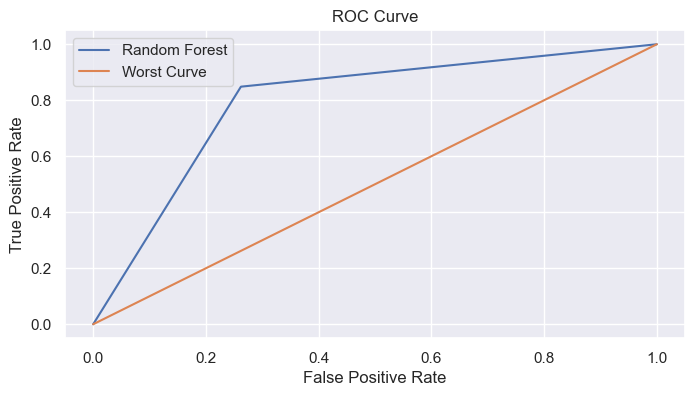

Observa-se um Auc-Roc de 0.79317


In [139]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 4))
plt.plot(fpr_forest, tp_forest,label='Random Forest')
plt.plot([0, 1], [0, 1] , label = 'Worst Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.legend()
plt.show()
print('Observa-se um Auc-Roc de {0:.5f}'.format(auc_score))

**Matriz de Confusão**

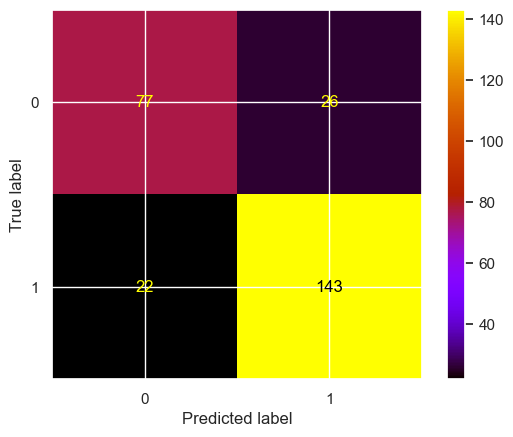

In [140]:
metrics.plot_confusion_matrix(forest , X_test , y_test ,cmap = 'gnuplot')
plt.show()

**5.2.2. Análise de Desempenho do modelo de Logistic Regression**

**Análise da Acurácia, Precisão, Recall, e F1-Score:** 

In [141]:
metricas = ['accuracy' , 'precision' , 'recall' , 'f1']

for metrica in metricas: 
    #print('---------- Métrica: {0}---------- '.format(metrica))
    lista_metrica = cross_val_score(logistic_regression , X_test , y_test , cv=10 , scoring = metrica)
    media_metrica = lista_metrica.mean()
    std_metrica = lista_metrica.std()
    print('Média de {0}:{1:.5f}'.format(metrica ,media_metrica))
    print('O Desvio Padrão de {0}: {1:.5f}'.format(metrica , std_metrica))

Média de accuracy:0.81695
O Desvio Padrão de accuracy: 0.06575
Média de precision:0.83251
O Desvio Padrão de precision: 0.07003
Média de recall:0.88493
O Desvio Padrão de recall: 0.06148
Média de f1:0.85597
O Desvio Padrão de f1: 0.05237


**Curva-Roc e Auc**

In [142]:
y_pred2 = cross_val_predict(logistic_regression , X_test, y_test, cv=10)

lista_rating = roc_curve(y_test , y_pred2)
fpr_regression = lista_rating[0]
tpr_regression = lista_rating[1]
auc_score_regression = metrics.auc(fpr_regression, tpr_regression)


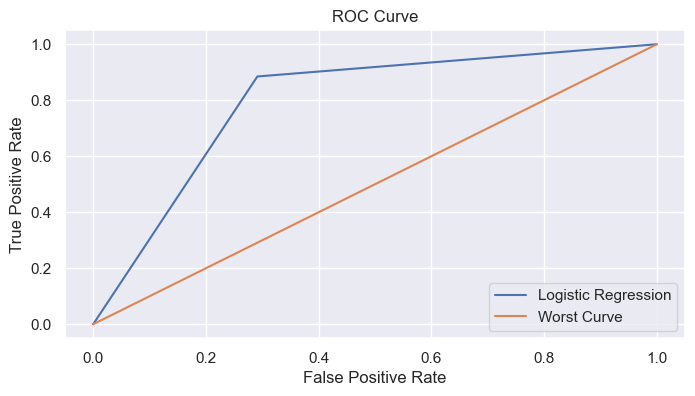

Observa-se um Auc-Roc de 0.79679


In [143]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 4))
plt.plot(fpr_regression, tpr_regression,label='Logistic Regression')
plt.plot([0, 1], [0, 1] , label = 'Worst Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.legend()
plt.show()
print('Observa-se um Auc-Roc de {0:.5f}'.format(auc_score_regression))

**Matriz de Confusão**

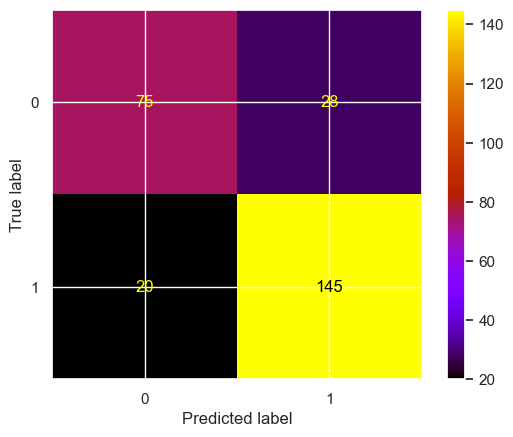

In [144]:
metrics.plot_confusion_matrix(logistic_regression , X_test , y_test , cmap = 'gnuplot')
plt.show()

**5.2.3. Análise de Desempenho do modelo de Multinomial Naive-Bayes**

In [145]:
metricas = ['accuracy' , 'precision' , 'recall' , 'f1']
#lista_anterior = []
for metrica in metricas: 
    #print('---------- Métrica: {0}---------- '.format(metrica))
    lista_metrica = cross_val_score(nave , X_test , y_test , cv=10 , scoring = metrica)
    media_metrica = lista_metrica.mean()
    #lista_anterior.append(media_metrica)
    std_metrica = lista_metrica.std()
    print('Média de {0}:{1:.5f}'.format(metrica ,media_metrica))
    print('O Desvio Padrão de {0}: {1:.5f}'.format(metrica , std_metrica))

Média de accuracy:0.65598
O Desvio Padrão de accuracy: 0.06451
Média de precision:0.69633
O Desvio Padrão de precision: 0.06156
Média de recall:0.79926
O Desvio Padrão de recall: 0.11024
Média de f1:0.73907
O Desvio Padrão de f1: 0.05646


**Curva-Roc e Auc**

In [146]:
y_pred3 = cross_val_predict(nave , X_test, y_test, cv=10)

lista_rating = roc_curve(y_test , y_pred3)
fpr_bayes = lista_rating[0]
tpr_bayes = lista_rating[1]
auc_score_bayes = metrics.auc(fpr_bayes, tpr_bayes)

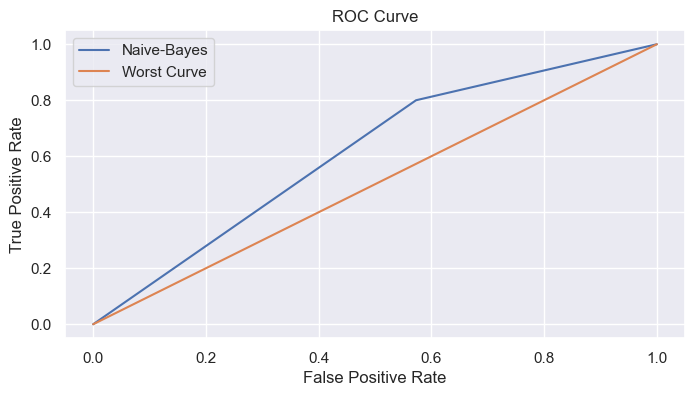

Observa-se um Auc-Roc de 0.61359


In [147]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 4))
plt.plot(fpr_bayes, tpr_bayes,label='Naive-Bayes')
plt.plot([0, 1], [0, 1] , label = 'Worst Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.legend()
plt.show()
print('Observa-se um Auc-Roc de {0:.5f}'.format(auc_score_bayes))

**Matriz de Confusão**

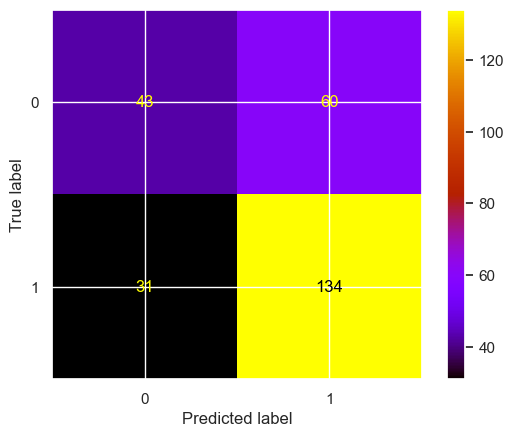

In [148]:
metrics.plot_confusion_matrix(nave , X_test , y_test , cmap = 'gnuplot')
plt.show()

<h3> Comparação entre os 3 Modelos </h3> 



> **1.Random Forest**: Apresentou uma consistência relevante quanto à resultados, visto que apresentou alto desempenho e baixo desvio padrão nas métricas utilizadas na metodologia de validação cruzada. Além disso, a Auc-Roc do Modelo evidencia um bom desempenho em relação à proporção entre falsos positivos e verdadeiros positivos. Baseado nesses fatores, nota-se que um modelo baseado em árvore é uma abordagem relevante, por identificar as semelhantes características, e a forma como elas se relacionam entre os grupos. Por fim, cabe ressaltar que, para melhoras na performance do modelo, poderia ter sido feito um tratamento mais embasado de outliers, e, é necessário um ajuste de hyperparâmetros, para previnir overfitting.

>**2.Regressão Logística:** Assim como o modelo Random Forest, apresentou um desempenho consistênte e significativo, de modo que a média das métricas apresentou um desempenho superior à 80%, e um desvio padrão muito baixo. Nesse sentido, mostra que o cálculo de probabilidade por meio dos coeficientes da regressão linear, pode ser interessante, nesse caso. Diante disso, cabe destacar que o ajuste de outliers no tratamento de dados pode ser relevante para alcançar o melhor desempenho. 

>**3.Multinomial Naive-Bayes:** Esse modelo foi utilizado como 'termômetro', para mensurar a relevância da relação entre as features, no problemas em questão. Dessa forma, por apresentar um desempenho muito inferior em relação aos demais, nota-se que é equivocado esa abordagem de independência, e isso manifestou-se no baixo desempenho da métrica `Precision`, de modo que apresenta uma grande sensibilidade à 'falsos positivos'. 
<br><br>
**Conclusão:** Diante da Análise citada para os modelos, e baseando-se na sensibilidade que cada um deles apresenta para o tratamento de dados em questão, será escolhido o modelo `Random Forest` para realizarmos o ajuste de hyperparâmetros e, consequentemente, submetermos a resposta, visto que ele apresentou um desempenho superior aos demais em todas as métricas de avaliação utilizadas nesse estudo.

<h3>6.Features mais relevantes</h3>
<br> <br> 
Diante do cenário de construção de um modelo preditivo, mensurado anteriormente, utilizarei de artifiícios do modelo Random Forest para mensurar as features mais relevantes para mensurar a variável target. 

<AxesSubplot:xlabel='importance', ylabel='features'>

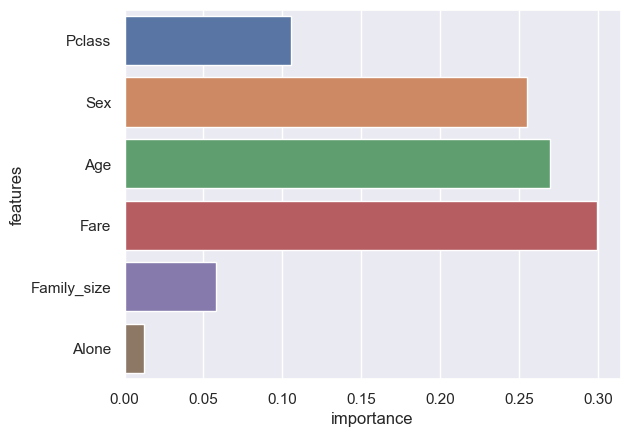

In [149]:
features_importance = forest.feature_importances_
features_importance
#Transformando em um DataFrame 
data_imp = pd.DataFrame({'features': X_train.columns , 'importance': features_importance})
sns.barplot(x = data_imp['importance'] , y = data_imp['features'])


<h3> 7. Ajuste de Hyperparâmetros </h3> 

Na etapa de ajuste de hyperparâmetros, buscarei refinar o desempenho do modelo, visando torná-lo mais consistente, e melhorar a sua taxa de acertos. Dessa forma, irei utilizar de uma função da Biblioteca `sklearn`, chamada `GridSearch`. Essa técnica consiste em testar todas as combinações de hyperparâmetros possíveis, e mensurar a de melhor desempenho, para utilizarmos no modelo. Como esse é um Dataframe de menor porte, essa técnica não torna-se muito trabalhosa para o computador.

In [158]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators' : [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [5 , 10 , 20 , None],
    'min_samples_leaf': [1, 2 , 4 ],
    'min_samples_split': [2 , 4 , 6],
}


grid_search = GridSearchCV(estimator=forest , param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [159]:
print("Melhores hiperparâmetros:", grid_search.best_params_)

# Melhor pontuação alcançada
print("Melhor pontuação:", grid_search.best_score_)

Melhores hiperparâmetros: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100}
Melhor pontuação: 0.8282193548387097


**Refazendo a Análise de Desempenho com esses parâmetros** 

In [160]:
forest2 = RandomForestClassifier(max_depth = 5, max_features='auto', min_samples_leaf= 2, min_samples_split= 6, n_estimators= 100)
forest2.fit(X_train , y_train)
y_pred1 = forest2.predict(X_test)
y_pred2 = forest2.predict(X_train)
print('Acurácia no Teste : ',metrics.accuracy_score(y_test, y_pred1)* 100) 
print('Acurácia no Treino : ',metrics.accuracy_score(y_train, y_pred2)* 100)

Acurácia no Teste :  80.59701492537313
Acurácia no Treino :  86.67736757624398


**Acuraccy , Precision , Recall e F1**

In [161]:
metricas = ['accuracy' , 'precision' , 'recall' , 'f1']
lista_nova = []
for metrica in metricas: 
    #print('---------- Métrica: {0}---------- '.format(metrica))
    lista_metrica = cross_val_score(forest2 , X_test , y_test , cv=10 , scoring = metrica)
    media_metrica = lista_metrica.mean()
    lista_nova.append(media_metrica)
    std_metrica = lista_metrica.std()
    print('Média de {0}:{1:.5f}'.format(metrica ,media_metrica))
    print('O Desvio Padrão de {0}: {1:.5f}'.format(metrica , std_metrica))


Média de accuracy:0.83917
O Desvio Padrão de accuracy: 0.05883
Média de precision:0.84807
O Desvio Padrão de precision: 0.06151
Média de recall:0.90294
O Desvio Padrão de recall: 0.06050
Média de f1:0.86858
O Desvio Padrão de f1: 0.04496


**Auc_score and Roc-Curve**

In [162]:
y_pred = cross_val_predict(forest2, X_test, y_test, cv=10)
lista_rating = roc_curve(y_test , y_pred)
fpr_forest = lista_rating[0]
tp_forest = lista_rating[1]
auc_score = metrics.auc(fpr_forest, tp_forest)
lista_nova.append(auc_score)

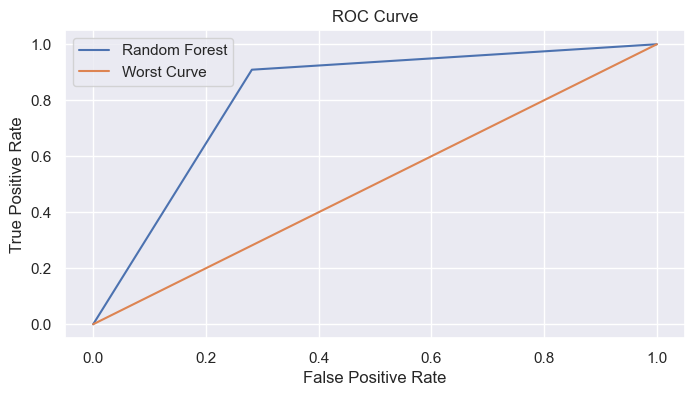

Observa-se um Auc-Roc de 0.81377


In [163]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 4))

plt.plot(fpr_forest, tp_forest,label='Random Forest')
plt.plot([0, 1], [0, 1] , label = 'Worst Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.legend()
plt.show()
print('Observa-se um Auc-Roc de {0:.5f}'.format(auc_score))

**Confusion Matrix** 

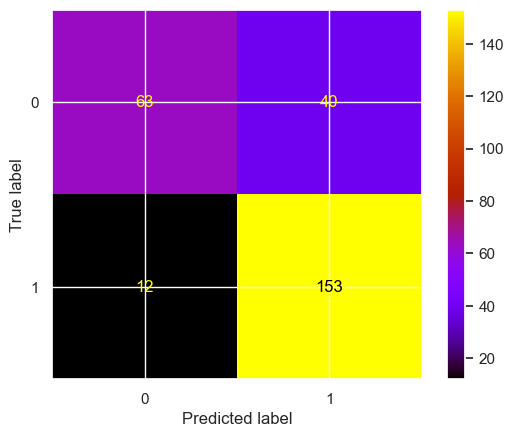

In [166]:

metrics.plot_confusion_matrix(forest2 , X_test , y_test ,cmap = 'gnuplot')
plt.show()


**Comparação de Resultados**

In [165]:
#metricas.append('Auc-Roc')
metricas = ['accuracy', 'precision', 'recall', 'f1', 'Auc-Roc']
dict_results = {'metrics' : metricas , 'Resultados iniciais': lista_anterior , 'Resultados Finais': lista_nova}
data_metrics = pd.DataFrame(dict_results)
data_metrics

,metrics,Resultados iniciais,Resultados Finais
0,accuracy,0.805413,0.839174
1,precision,0.856941,0.848072
2,recall,0.855515,0.902941
3,f1,0.856017,0.868577
4,Auc-Roc,0.793174,0.813769


A partir dessa comparação, percebe-se a melhoria do desempenho do modelo para 4 das 5 métricas de avaliação, e isso torna-a extremamente eficiente, para a metodologia proposta.

<h2> 8.Conclusão </h2> 

**1. Análise dos Objetivos.**

>**Objetivo 1:** Identificar as Características de perfil mais relevantes para a morte, ou não do indivíduo no acidente<br>
>**Objetivo 2:** Utilização de Modelos de Aprendizado de Máquina para treinar o algoritimo e prever a sobrevivência, ou não, de cada indivíduo.

- **Objetivo 1**: A partir dos resultados obtidos nas etapas de `Análise exploratória` e de `Detectação de Features mais relevantes`, percebe-se que as features `Sex` , `Fare` e `Age`, destacam-se em relação às demais, para mensurar a sobrevivência de um indivíduo. Dessa forma, retomando a análise de perfil feita ao final da análise exploratória, e, generalizando-a, temos os seguintes perfis: 
<br>
* **1.Sobrevivente:**
    - Mulher;
    - Tarifa superior à 10 mil;
    - Idade inferior à 30 anos;
    - 1ª classe.
* **2. Morto:**
    - Homem; 
    - Tarifa inferior à 5 mil; 
    - Idade entre 25 à 50 anos; 
    - 3ª classe.<br><br>
Dessa forma, nota-se que o objetivo 1 foi bem-sucedido. <br> <br>
- **Objetivo 2**: Com base na construção de modelos de Machine Learning nos tópicos 4 à 7, nota-se que a utilização de Modelos de Machine Learning supervisionados, para problemas de classificação, foi bem sucedido, também. Esse fato é exposto pela análise de desempenho feita, com métricas superiores à 80%, de modo geral. Além disso, com o ajuste de Hiperparâmetros feito no modelo de `Random Forest`, houve otimização ainda maior dos resultados, o que mostra que o objetivo foi concluído. Por fim, é relevante mencionar que a desproporção entre o número de sobreviventes e de mortos foi um fator que pode dificultar o desempenho do modelo.


<h2>9. Referências</h2>

<a href= 